In [8]:
import pandas as pd
from datetime import datetime, date
import pickle
import re
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [6]:
df = pd.read_csv('careerjet_pracuj_python_2023-11-25.csv', index_col=0)
df.sample(5)

,title,link,company,location,salary,description,date_added,skills,search_term,date_searched
77,Senior machine learning developer - praca zdalna,careerjet.pl/jobad/pl0ec30ce2b34b7e8cb69fe8e4a...,HRlink,"Warszawa, mazowieckie",NaN,HRlink jest firmą technologiczną z branży IT. ...,NaN,NaN,python,2023-11-25
68,Technical Support Engineer (hybrid job + reloc...,careerjet.pl/jobad/plf5b1dd38ec28c48901bdfba86...,NaN,"Kraków, małopolskie",NaN,We are looking for a Technical Support Enginee...,NaN,NaN,python,2023-11-25
85,Technical Support Engineer (praca hybrydowa bo...,careerjet.pl/jobad/pla9ec001b183c4affc84b69208...,NaN,"Wrocław, dolnośląskie",NaN,Dla naszego klienta szukamy Inżyniera Wsparcia...,NaN,NaN,python,2023-11-25
214,Python Developer,https://www.pracuj.pl/praca/python-developer-w...,NaN,NaN,16 000–28 000 zł / mies. (zal. od umowy),Internal IT Project Medplanic => Roster Planni...,NaN,['Python'],python,2023-11-25
257,NaN,NaN,NaN,NaN,NaN,Big Data is reality for us (several petabytes ...,NaN,"['SQL', 'Tableau', 'Data Studio']",python,2023-11-25


### Check the count of null values in each Column

In [10]:
null_count = df.isna().sum()
null_count = pd.DataFrame(null_count)
null_count = null_count.T
null_count

,title,link,company,location,salary,description,date_added,skills,search_term,date_searched
0,37,37,284,250,244,91,350,100,0,0


In [11]:
skills = df['skills']

In [12]:
skills_clean = skills.dropna()

In [13]:
len(skills_clean)

250

In [21]:
skills_clean = pd.DataFrame(skills_clean, columns=['skills'])
skills_clean = skills_clean.reset_index(drop=True)
skills_clean.head()

,skills
0,"['Python', 'Apache Camel', 'DB', 'Java']"
1,"['Python', 'CI/CD', 'Apache Camel', 'DB', 'Jav..."
2,"['ETL', 'Python', 'SQL', 'AWS', 'PostgreSQL']"
3,"['C++', 'C#', 'Python', 'Git', 'Visual Studio']"
4,"['SQL', 'Node.js', 'Python', 'Git', 'Looker']"


In [48]:
# skills_split = skills_clean.skills.apply(pd.Series)
# skills_split[['skill1','skill2', 'rest']] = pd.DataFrame(skills_clean.skills.tolist())
# skills_split = pd.DataFrame(skills_clean.skills.tolist())
# print(skills_split.head())
# skills_split.rename(columns={0:'skill1', 1:'skill2',
#                                2:'skill3', 3:'skill4',
#                                4:'skill5', 5:'skill6'}, inplace=True)
# skills_split.head()
skills_string = skills_clean['skills'].str.split(',', expand=True)
# skills_string.apply(lambda x: re.sub('[a-zA-Z]+', '', x))
# skills_string = skills_string.replace(r'([a-zA-Z]*)', r'\1', regex=True)
skills_string = skills_string.replace(r'\[', r'', regex=True)
skills_string = skills_string.replace(r'\]', r'', regex=True)
skills_string.drop
skills_string.head()


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,'Python','Apache Camel','DB','Java',None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,'Python','CI/CD','Apache Camel','DB','Java','Git','Jenkins',None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,'ETL','Python','SQL','AWS','PostgreSQL',None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,'C++','C#','Python','Git','Visual Studio',None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,'SQL','Node.js','Python','Git','Looker',None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [63]:
skills_string = skills_string.loc[:, :6]
skills_string.fillna("", inplace=True)
skills_string.head()

,0,1,2,3,4,5,6
0,'Python','Apache Camel','DB','Java',,,
1,'Python','CI/CD','Apache Camel','DB','Java','Git','Jenkins'
2,'ETL','Python','SQL','AWS','PostgreSQL',,
3,'C++','C#','Python','Git','Visual Studio',,
4,'SQL','Node.js','Python','Git','Looker',,


Text(0.5, 1.0, 'Skills word cloud')

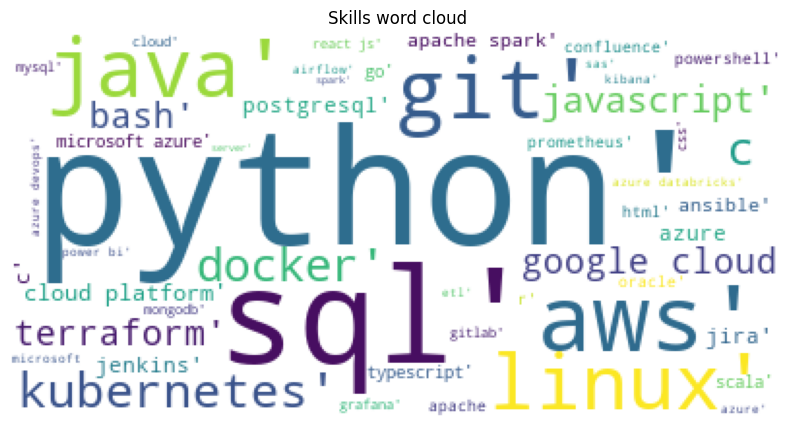

In [65]:
# skills_string['joined'] = skills_string[[0,1,2,3,4,5,6]].agg(', '.join, axis=1)
sum_string = ''
for column in skills_string.columns:
    sum_string += ' '.join(skills_string[column].str.lower())
# skills_string[0]
# skills_string.columns[0]
# skills_string[skills_string.columns[0]]
plt.figure(figsize=(10,10))
wc = WordCloud(background_color="white", stopwords=STOPWORDS, max_words=50)
wc.generate(sum_string)
plt.imshow(wc)
plt.axis('off')
plt.title('Skills word cloud')